In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\\ExcelR_project\\Fake_Bill_Detection_Project\\Fake_bills_prediction_app\\df_clean.csv")
df.drop(['cluster'],axis=1,inplace=True)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.46,103.36,103.66,3.77,2.99,113.09
1,1.0,172.69,104.48,103.50,4.40,2.94,113.16
2,1.0,171.36,103.91,103.94,3.62,3.01,113.51
3,1.0,171.73,104.28,103.46,4.04,3.48,112.54
4,1.0,172.17,103.74,104.08,4.42,2.95,112.81


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['diagonal','height_left','height_right','margin_low','margin_up','length']],df['is_genuine'],test_size=0.30,random_state=42) # data for training model 30%

### Random Forest Classifier

In [4]:
rfc = RandomForestClassifier()
# Train the model
rfc.fit(X_train, y_train)

# Test the model
y_pred = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)

print(f'Accuracy_rfc: {accuracy_rfc}')

Accuracy_rfc: 0.993103448275862


In [5]:
print('Accuracy is: ', accuracy_rfc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_rfc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_rfc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_rfc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_rfc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.3103448275862
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       132
         1.0       1.00      0.99      1.00       303

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[131   1]
 [  2 301]]


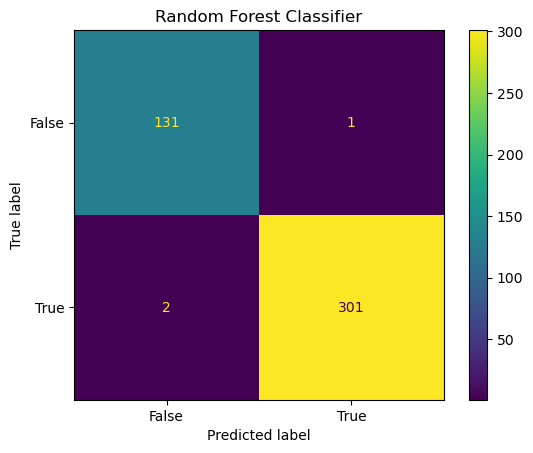

Accuracy_rfc: 0.99


In [6]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()
print(f'Accuracy_rfc: {accuracy_rfc}')

### create pickle file and save ML part

In [7]:
import pickle

pickle.dump(rfc,open('random_forest_classifier.pkl','wb'))

In [8]:
loaded_model = pickle.load(open('E:\\ExcelR_project\\Fake_Bill_Detection_Project\\Fake_bills_prediction_app\\random_forest_classifier.pkl', 'rb'))
result = loaded_model.predict(X_test)
print(result)

[1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.